In [1]:
import xarray as xr
import numpy as np

In [2]:
lon = xr.DataArray(np.arange(0, 180, 1), dims=("lon", ))
depth = xr.DataArray(np.arange(0, 50, 5), dims=("depth", ))

In [3]:
MLD = xr.DataArray(
    5 + 20 * np.sin(np.deg2rad(lon)),
    dims=("lon", ),
    coords={"lon": lon},
)
MLD

<xarray.DataArray (lon: 180)>
array([ 5.        ,  5.34904813,  5.69798993,  6.04671912,  6.39512947,
        6.74311485,  7.09056927,  7.43738687,  7.78346202,  8.1286893 ,
        8.47296355,  8.81617991,  9.15823382,  9.49902109,  9.83843791,
       10.1763809 , 10.51274712, 10.84743409, 11.18033989, 11.51136309,
       11.84040287, 12.16735899, 12.49213187, 12.81462257, 13.13473286,
       13.45236523, 13.76742294, 14.07980999, 14.38943126, 14.6961924 ,
       15.        , 15.3007615 , 15.59838528, 15.8927807 , 16.18385807,
       16.47152873, 16.75570505, 17.03630046, 17.31322951, 17.58640782,
       17.85575219, 18.12118058, 18.38261213, 18.6399672 , 18.89316741,
       19.14213562, 19.38679601, 19.62707403, 19.86289651, 20.0941916 ,
       20.32088886, 20.54291923, 20.76021507, 20.9727102 , 21.18033989,
       21.38304089, 21.58075145, 21.77341136, 21.96096192, 22.14334601,
       22.32050808, 22.49239414, 22.65895186, 22.82013048, 22.97588093,
       23.12615574, 23.27090915, 23.41009707, 23.54367709, 23.67160853,
       23.79385242, 23.91037151, 24.02113033, 24.12609512, 24.22523392,
       24.31851653, 24.40591453, 24.4874013 , 24.56295201, 24.63254367,
       24.69615506, 24.75376681, 24.80536137, 24.85092303, 24.89043791,
       24.92389396, 24.95128101, 24.9725907 , 24.98781654, 24.9969539 ,
       25.        , 24.9969539 , 24.98781654, 24.9725907 , 24.95128101,
       24.92389396, 24.89043791, 24.85092303, 24.80536137, 24.75376681,
       24.69615506, 24.63254367, 24.56295201, 24.4874013 , 24.40591453,
       24.31851653, 24.22523392, 24.12609512, 24.02113033, 23.91037151,
       23.79385242, 23.67160853, 23.54367709, 23.41009707, 23.27090915,
       23.12615574, 22.97588093, 22.82013048, 22.65895186, 22.49239414,
       22.32050808, 22.14334601, 21.96096192, 21.77341136, 21.58075145,
       21.38304089, 21.18033989, 20.9727102 , 20.76021507, 20.54291923,
       20.32088886, 20.0941916 , 19.86289651, 19.62707403, 19.38679601,
       19.14213562, 18.89316741, 18.6399672 , 18.38261213, 18.12118058,
       17.85575219, 17.58640782, 17.31322951, 17.03630046, 16.75570505,
       16.47152873, 16.18385807, 15.8927807 , 15.59838528, 15.3007615 ,
       15.        , 14.6961924 , 14.38943126, 14.07980999, 13.76742294,
       13.45236523, 13.13473286, 12.81462257, 12.49213187, 12.16735899,
       11.84040287, 11.51136309, 11.18033989, 10.84743409, 10.51274712,
       10.1763809 ,  9.83843791,  9.49902109,  9.15823382,  8.81617991,
        8.47296355,  8.1286893 ,  7.78346202,  7.43738687,  7.09056927,
        6.74311485,  6.39512947,  6.04671912,  5.69798993,  5.34904813])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179

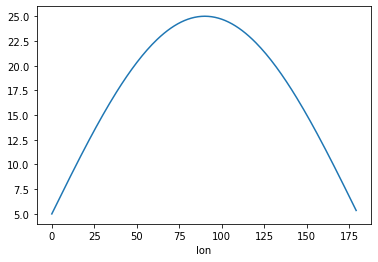

In [4]:
MLD.plot()

In [5]:
T = xr.DataArray(
    (
        np.random.normal(size=(len(depth), len(lon)))
        + 20 * xr.ufuncs.exp(- depth / MLD)
    ),
    coords={"lon": lon, "depth": depth},
)
T

<xarray.DataArray (depth: 10, lon: 180)>
array([[20.71384294, 21.26467653, 19.81929547, ..., 20.77545545,
        20.21073074, 21.74711764],
       [ 5.75428064,  9.05888243,  7.41205929, ...,  7.97568056,
         7.63299727,  6.83962147],
       [ 0.75174684,  4.1015547 ,  4.15558918, ...,  4.76073315,
         3.87093426,  1.62454323],
       ...,
       [-1.08123236, -0.79932163, -1.45502317, ...,  0.34559226,
        -0.08025099,  0.06051932],
       [-1.07923324, -1.59709043,  0.82397454, ...,  0.69650911,
        -0.93808608, -0.49219324],
       [-0.91522901, -2.42299811,  1.60963657, ..., -0.59408755,
        -0.41265848,  0.99997935]])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
  * depth    (depth) int64 0 5 10 15 20 25 30 35 40 45

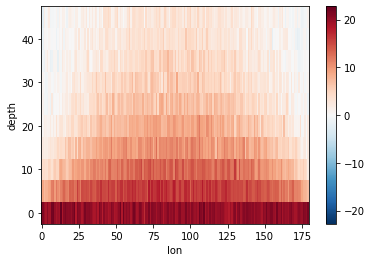

In [6]:
T.plot()

In [7]:
mld_temp = T.isel(depth=0) / np.exp(1)
mld_temp

<xarray.DataArray (lon: 180)>
array([7.62019697, 7.82283732, 7.29111134, 6.94926768, 7.53445248,
       7.0254904 , 7.00331213, 8.09925471, 8.150159  , 7.38934108,
       6.97193402, 7.25029323, 7.01799091, 8.37373037, 6.82665427,
       7.62079476, 7.90734772, 7.55220197, 7.46057591, 7.54993818,
       7.31572251, 7.68093932, 8.1371067 , 6.71349753, 7.79593221,
       7.54659743, 7.43721378, 6.84656182, 7.24098213, 7.95413471,
       7.50300659, 7.5449544 , 7.65329467, 7.44927084, 7.11087131,
       6.83994655, 6.87341785, 7.31862387, 6.80268596, 7.90333962,
       7.45359168, 6.58561322, 7.52753359, 7.06609902, 7.23670338,
       6.84221044, 7.01730827, 7.70204257, 7.44483095, 6.83884708,
       6.96712815, 7.1601971 , 7.52188427, 8.11722237, 6.74956014,
       8.13814269, 7.24786096, 7.52651379, 7.27885324, 7.57057741,
       6.92275666, 7.52215414, 7.98321822, 7.54853161, 6.97745537,
       7.13717969, 7.84663412, 7.57286117, 7.04488462, 6.20379603,
       7.38146822, 7.20706537, 7.87841123, 6.96157668, 7.66439101,
       7.57993719, 7.4863518 , 7.01630415, 7.42364604, 7.47720211,
       7.74768457, 7.37637169, 6.68360384, 7.20033419, 7.39222171,
       7.69031694, 7.18842722, 7.43647698, 7.22848984, 7.5974479 ,
       6.87321178, 7.0359956 , 7.56127888, 7.73105741, 7.17249662,
       7.17049862, 7.19623451, 7.89997339, 7.22853498, 7.47429574,
       6.99003856, 7.63545246, 7.37569078, 7.17332465, 7.36918819,
       7.01723574, 8.15366829, 7.67507983, 7.42251262, 8.14758965,
       6.92478276, 7.32777241, 7.05231399, 7.6556873 , 7.31332555,
       7.56512944, 7.71403388, 7.13218718, 7.2633627 , 7.28030328,
       7.55067976, 7.27484656, 7.38925931, 7.01447962, 6.80545779,
       6.87759501, 6.55422317, 7.17020957, 6.78883725, 7.47693385,
       7.69801839, 6.76567313, 7.57860926, 7.72920205, 7.0098812 ,
       7.45338475, 7.67356362, 7.4230997 , 7.76796929, 7.59625033,
       7.56452921, 7.35078738, 7.54905422, 7.09554695, 7.48442535,
       7.39065774, 7.3866971 , 7.25948756, 6.92197186, 7.54641861,
       7.35369868, 8.02202564, 7.40001208, 7.46847456, 7.82809209,
       7.77479161, 7.27368303, 7.07031603, 8.03785124, 7.29823235,
       7.28808295, 7.76632341, 6.94231147, 7.45062379, 7.25149703,
       7.29759894, 7.07493314, 7.53197337, 7.76497364, 7.27493512,
       6.96414803, 6.98837949, 7.29492597, 7.55423436, 7.35340129,
       7.23034828, 7.79860742, 7.64286294, 7.43511233, 8.00031748])
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 172 173 174 175 176 177 178 179
    depth    int64 0

In [10]:
from matplotlib import pyplot as plt

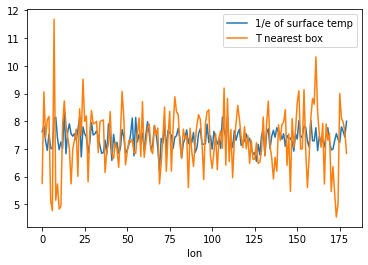

In [12]:
mld_temp.plot(label="1/e of surface temp")
T.isel(depth=abs(T - mld_temp).argmin("depth")).plot(label="T in nearest box")
plt.gca().legend()